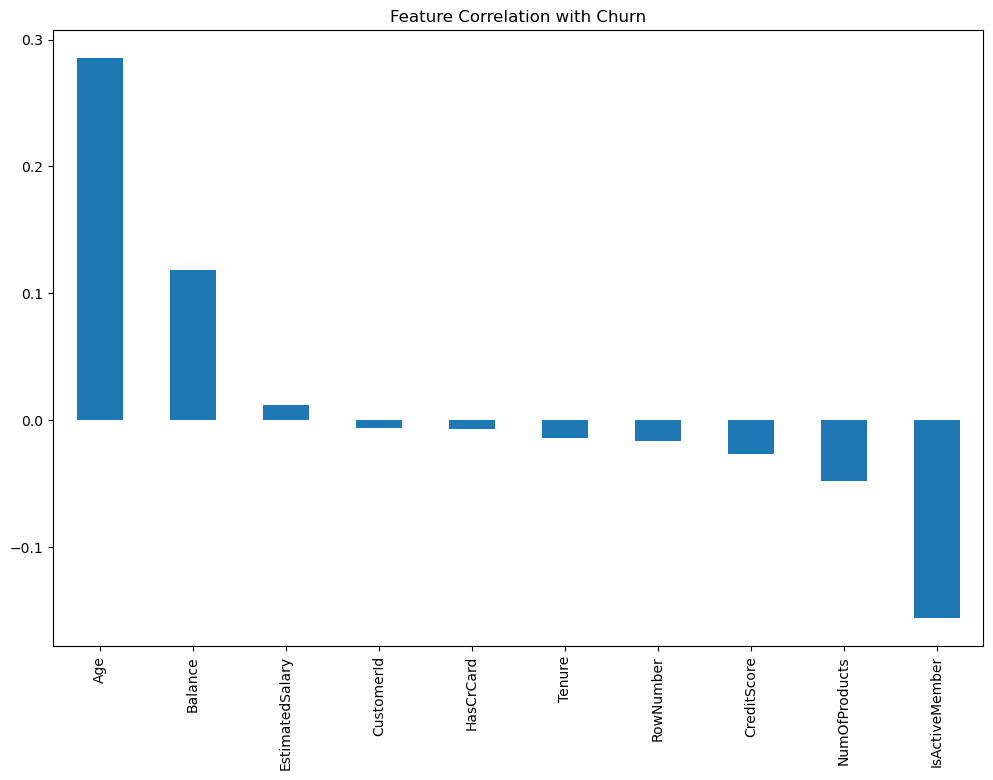

Epoch 1/100


C:\Users\Precious\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7694 - loss: 0.5145 - val_accuracy: 0.8338 - val_loss: 0.4087
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8297 - loss: 0.4076 - val_accuracy: 0.8500 - val_loss: 0.3741
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8495 - loss: 0.3627 - val_accuracy: 0.8487 - val_loss: 0.3588
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8600 - loss: 0.3449 - val_accuracy: 0.8512 - val_loss: 0.3519
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8573 - loss: 0.3373 - val_accuracy: 0.8537 - val_loss: 0.3510
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8661 - loss: 0.3321 - val_accuracy: 0.8562 - val_loss: 0.3461
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8672 - loss: 0.3290 - val_accuracy: 0.8594 - val_loss: 0.3456
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8632 - loss: 0.3299 - val_accuracy: 0.

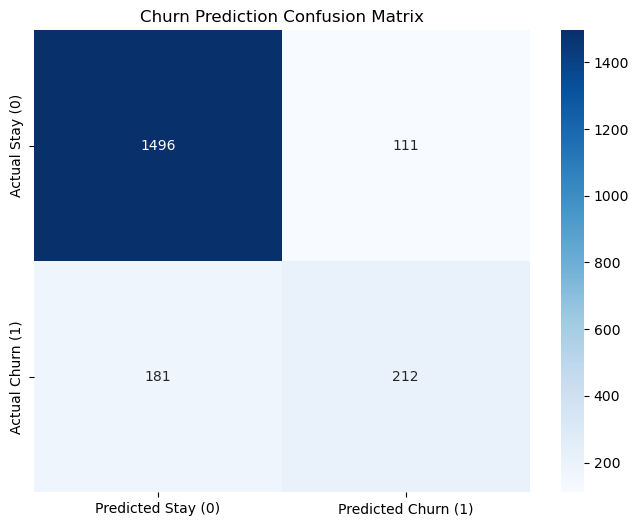

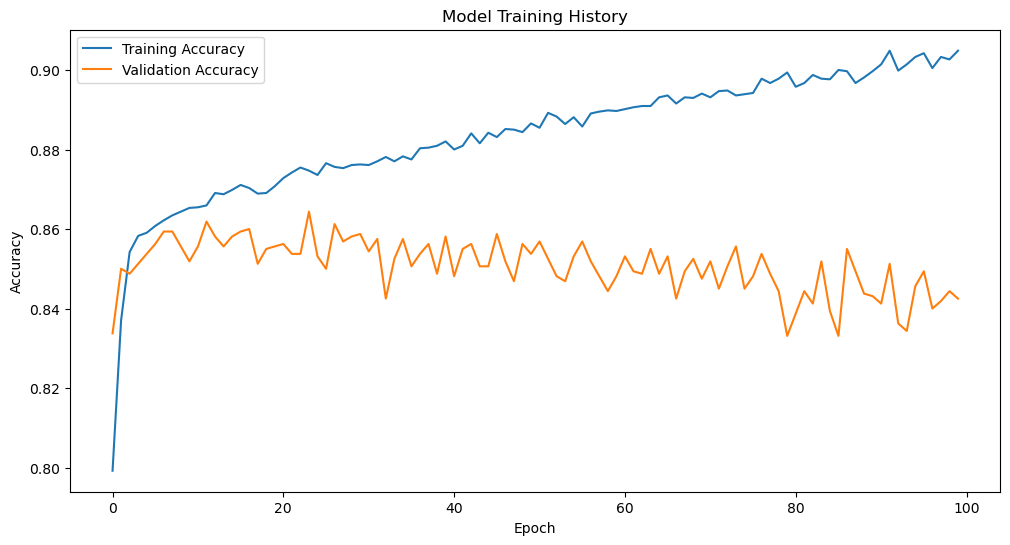

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv('C:\\Users\\Precious\\Downloads\\Churn_Modelling.csv')

# Feature significance analysis using correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
plt.title('Feature Correlation with Churn')
(corr_matrix['Exited'].sort_values(ascending=False)[1:]
 .plot(kind='bar'))
plt.show()

# Data preprocessing
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

# Encode categorical data Geography and Gender columns
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), [1, 2])
], remainder='passthrough')
X = ct.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build ANN
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

# Evaluate model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Stay (0)', 'Predicted Churn (1)'],
            yticklabels=['Actual Stay (0)', 'Actual Churn (1)'])
plt.title('Churn Prediction Confusion Matrix')
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()